# 图与路径

## 生成迷宫

ref: https://github.com/tpof314/maze

- 生成一张网格，把网格里面的所有边都存进一个列表edgeList里面.
- 从(0, 0)开始，做DFS。每次DFS的时候，随机地选择四周一个没有走过的格子，凿墙过去，把道路打通。凿墙的时候，把edgeList列表中相对应的那堵墙删除掉。
- 将剩下的没有凿开过的墙画出来，就是一个完整的迷宫了。

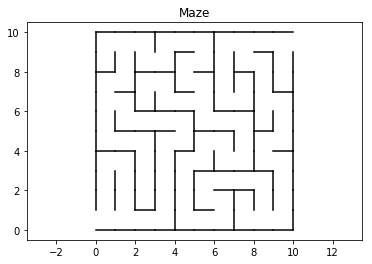

In [2]:
import sys
import matplotlib
import matplotlib.pyplot as plt
from random import randint
from IPython import display
%matplotlib inline

WIDTH  = 10
HEIGHT = 10
# sys.setrecursionlimit(WIDTH * HEIGHT)

def initVisitedList():
    visited = []
    for y in range(HEIGHT):
        line = []
        for x in range(WIDTH):
            line.append(False)
        visited.append(line)
    return visited

def drawLine(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], color="black")

def removeLine(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], color="white")

def get_edges(x, y):
    result = []
    result.append((x, y, x, y+1))
    result.append((x+1, y, x+1, y+1))
    result.append((x, y, x+1, y))
    result.append((x, y+1, x+1, y+1))

    return result

def drawCell(x, y):
    edges = get_edges(x, y)
    for item in edges:
        drawLine(item[0], item[1], item[2], item[3])

def getCommonEdge(cell1_x, cell1_y, cell2_x, cell2_y):
    edges1 = get_edges(cell1_x, cell1_y)
    edges2 = set(get_edges(cell2_x, cell2_y))
    for edge in edges1:
        if edge in edges2:
            return edge
    return None

def initEdgeList():
    edges = set()
    for x in range(WIDTH):
        for y in range(HEIGHT):
            cellEdges = get_edges(x, y)
            for edge in cellEdges:
                edges.add(edge)
    return edges

def isValidPosition(x, y):
    if x < 0 or x >= WIDTH:
        return False
    elif y < 0 or y >= HEIGHT:
        return False
    else:
        return True

def shuffle(dX, dY):
    for t in range(4):
        i = randint(0, 3)
        j = randint(0, 3)
        dX[i], dX[j] = dX[j], dX[i]
        dY[i], dY[j] = dY[j], dY[i]

def DFS(X, Y, edgeList, visited):
    dX = [0,  0, -1, 1]
    dY = [-1, 1, 0,  0]
    shuffle(dX, dY)
    for i in range(len(dX)):
        nextX = X + dX[i]
        nextY = Y + dY[i]
        if isValidPosition(nextX, nextY):
            if not visited[nextY][nextX]:
                visited[nextY][nextX] = True
                commonEdge = getCommonEdge(X, Y, nextX, nextY)
                if commonEdge in edgeList:
                    edgeList.remove(commonEdge)
                DFS(nextX, nextY, edgeList, visited)

plt.axis('equal')
plt.title('Maze')
edgeList = initEdgeList()
visited  = initVisitedList()
DFS(0, 0, edgeList, visited)
edgeList.remove((0, 0, 0, 1))
edgeList.remove((WIDTH, HEIGHT-1, WIDTH, HEIGHT))
for edge in edgeList:
    drawLine(edge[0], edge[1], edge[2], edge[3])
    # display.clear_output(wait=True)
    # plt.pause(0.01)
plt.show()

In [3]:
edgeList = initEdgeList()
print(edgeList)

{(7, 8, 7, 9), (6, 4, 7, 4), (6, 8, 6, 9), (8, 4, 9, 4), (2, 9, 2, 10), (5, 4, 5, 5), (3, 4, 4, 4), (7, 2, 7, 3), (9, 10, 10, 10), (1, 8, 1, 9), (1, 4, 2, 4), (4, 6, 5, 6), (9, 1, 10, 1), (2, 2, 3, 2), (5, 1, 6, 1), (6, 0, 6, 1), (8, 10, 9, 10), (2, 1, 2, 2), (9, 2, 10, 2), (0, 8, 0, 9), (9, 5, 10, 5), (10, 8, 10, 9), (5, 2, 6, 2), (0, 3, 1, 3), (5, 8, 6, 8), (10, 4, 10, 5), (3, 0, 3, 1), (6, 3, 6, 4), (3, 5, 4, 5), (0, 7, 1, 7), (5, 9, 6, 9), (0, 5, 0, 6), (8, 2, 9, 2), (10, 0, 10, 1), (3, 4, 3, 5), (0, 0, 0, 1), (3, 1, 3, 2), (4, 2, 5, 2), (5, 10, 6, 10), (1, 3, 2, 3), (3, 3, 4, 3), (0, 4, 0, 5), (7, 2, 8, 2), (8, 9, 9, 9), (10, 3, 10, 4), (0, 8, 1, 8), (1, 7, 2, 7), (4, 9, 4, 10), (3, 10, 4, 10), (2, 6, 2, 7), (3, 9, 3, 10), (4, 10, 5, 10), (5, 4, 6, 4), (8, 3, 8, 4), (2, 8, 3, 8), (8, 1, 9, 1), (2, 2, 2, 3), (1, 5, 1, 6), (4, 3, 4, 4), (4, 1, 5, 1), (5, 8, 5, 9), (7, 4, 8, 4), (8, 5, 9, 5), (6, 3, 7, 3), (2, 10, 3, 10), (1, 2, 1, 3), (2, 0, 3, 0), (4, 7, 5, 7), (4, 5, 4, 6), (6, 6,

## 1 走迷宫

迷宫设计，使用二维数组（python中为二维列表）


In [ ]:
map = [[1,0,1,1,1,1,1,1,1,1,1,1],
       [1,0,1,0,1,0,0,0,1,0,0,1],
       [1,0,1,0,1,0,1,0,1,1,0,1],
       [1,0,1,0,1,0,1,0,0,0,0,1],
       [1,0,1,0,1,0,1,0,1,1,0,1],
       [1,0,1,0,0,0,1,0,1,0,0,1],
       [1,0,1,0,1,0,1,0,1,1,0,1],
       [1,0,1,0,1,0,0,0,1,0,0,1],
       [1,0,1,0,1,0,1,0,1,0,1,1],
       [1,0,1,0,1,1,1,0,1,0,0,1],
       [1,0,0,0,0,0,1,0,1,1,0,0],
       [1,1,1,1,1,1,1,1,1,1,1,1]]

print(map)

### 1.1 沿墙走迷宫

### 1.2 深度优先搜索

### 1.3 广度优先搜索

## 2 最短路径

### 2.1 Dijkstra算法

### 2.2 双向搜索（A*算法）